**2022-04-06 `15.2-R - Statistical Analysis Using R`**

**Objectives**
* Use one-sample and two-sample t-tests.
* Use ANOVA.
* Perform linear and multiple linear regression.

**Presentation**
* [15.2-R - Statistical Analysis Using R](https://ucb.bootcampcontent.com/UCB-Coding-Bootcamp/ucb-virt-data-pt-10-2021-u-b/-/blob/master/03-Lesson-Plans/15-R/Slideshows/Data-M_15.2-R.pdf)

**Definition**
* **Hypothesis**: A `Promise/Claim` that we want to `Test/Investegate`.
* **Null Hypothesis**: `H0` Is a `default hypothesis` , Currently accepted value for a parameter.
* **Alternative Hypothesis**: `Ha` is the `Research Hypothesis` and it involves the claim to be tested.
* **Test Statistics**: Calculated from `Sample Data` and used to decide.
* **Statistically Significant**: Where do we make a decision to reject `H0` or fail to reject it?
* **Level of Confidence**: How confident in our decision, usually %95/%99.
* **Level of Significance (Alpha)**: Alpha = 1 - Level of Confidence.
* **Test Result**:
  - Reject the `Null Hypothesis` `H0`.
  - Fail to reject the `Null Hypothesis` `H0`.
  
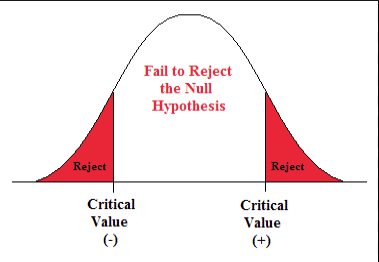

# ==========================================

### 2.00 Instructor Do: Hypothesis Testing (0:10)

![](../Images/scientific_method.png)

* The act of manipulating, visualizing, and summarizing data is known as `exploratory data analysis`. It is an essential step in the `scientific method`, which is used to draw formal conclusions about data.

* **STEP 1**: Exploratory Data Analysis.
* **STEP 2**: Building a hypothesis based on our exploratory data analysis and research.


* **Hypothesis** is a proposed solution or generalization to a scientific question that may be asked about our data.

# ==========================================

### 2.01 Partners Do: Forming Null and Alternative Hypotheses (0:15)

# Instructions

When it comes to creating a hypothesis, you must first start by proposing a question. These questions will often come from looking at data you have summarized or visualized. For this activity, you and a partner will look at some example questions we may ask in a scientific study, or for an analysis in an industry job. Creating hypotheses is a critical skill in order to properly identify what statistical analysis to use when analyzing data.

1. Based on the following scientific questions, work with your partner to create a hypothesis statement:

   * Does dark chocolate affect arterial (heart and circulatory system) function in healthy individuals?

   * Does coffee have anti-aging properties?

   * Is biodiesel better for the environment than fossil fuel?

2. For each hypothesis statement, propose a null and alternative hypothesis.

**Note:** Be prepared to discuss your answers when you return to the class.

---

# Null Hypothesis

* Does dark chocolate positively affect arterial function in healthy individuals? 

  * Hypothesis - If dark chocolate is related to arterial function in healthy individuals, then consuming 30g of dark chocolate per day for 1 year will result in improved arterial function.

  * Null Hypothesis - If dark chocolate is not related to arterial function in healthy individuals, then consuming 30g per day of dark chocolate for 1 year will show no improvement in arterial function.

  * Alternative Hypothesis - If dark chocolate is related to arterial function in healthy individuals, then consuming 30g of dark chocolate per day for 1 year will show improvement in arterial function.

* Does coffee have anti-aging properties?

  * Hypothesis - If coffee consumption is related to anti-aging, then consuming 400mg of coffee daily will reduce mortality from age-related disease such as heart disease.

  * Null Hypothesis - If coffee consumption is not related to anti-aging, then consuming 400mg of coffee daily will not show a reduction in age-related disease such as heart disease.

  * Alternative Hypothesis - If coffee consumption is related to anti-aging, then consuming 400mg of coffee daily will show a reduction in age-related disease such as heart disease.

* Is biodesel better for the environment than fossil fuel?

  * Hypothesis - If we assume that carbon emission is the largest contributing factor to environmental damage from burning fuel, then biodiesel should produce significantly less carbon than fossil fuel.

  * Null Hypothesis - If we burn one gallon of both fuels, fossil fuel will produce the same or less carbon than biodiesel.

  * Alternative Hypothesis - If we burn one gallon of both fuels, fossil fuel will produce more carbon than biodiesel.



# ==========================================

### 2.02 Instructor Do: T-Test (0:10)

* A **t-test** can be used to compare the mean of a sample to the population (one-sample t-test) or the difference between population means (two-sample t-test).
* The **null hypothesis** assumes that there is no meaningful difference between the two means. Therefore, the goal of the t-test is to reject the null hypothesis.
---

#### 1 Sample ttest
```R
# Generate some fake data to test with
set.seed(42)
population1 = rnorm(1000)
population2 = sample(population1, 200)
t.test(population2, mu=mean(population1))

# Generate data with a bigger difference in means
population3 = rnorm(1000, -2)
t.test(population2, mu=mean(population3))
```
---

#### Independent ttest
```R
# Generate some fake data to test with
set.seed(42)
population1 = rnorm(1000)
population2 = rnorm(1000)
t.test(population1, population2)

# Generate data with a bigger difference in means
population1 = rnorm(1000)
population2 = rnorm(1000, -2)
t.test(population1, population2)

```

# ==========================================

### 2.03 Students Do: T-Test (0:10)

# T-Test

In this activity, you will use a t-test to compare the difference in adult sardine vertebrae counts from two locations. Applying t-tests to determine how similar two datasets are will be an important skill in your future careers.

## Instructions

* Calculate the mean for each population.

* Use a t-test to determine if there is a statistically significant difference in the number of vertebrae of Adult Sardines in Alaska vs. San Diego.

* It is up to you to determine if you should use a one sample or a two sample (independent) t-test.

---

```R
sardines <- read.csv(file="03-Stu_Sardines/Resources/sardines.csv")

# Calculate the population mean for Sardine Vertebrae in Alaska.
# Hint: use the subset() function to get only the data for Alaska.
population1 = subset(sardines, location == 1)
mean(population1[['vertebrae']])

# Calculate the population mean for Sardine Vertebrae in San Diego.
# Hint: use the subset() function to get only the data for San Diego.
population2 = subset(sardines, location == 6)
mean(population2[['vertebrae']])

# Calculate Independent (Two Sample) T-Test
t.test(population1[['vertebrae']], population2[['vertebrae']])

```

# ==========================================

### 2.04 Instructor Do: ANOVA (0:10)

* The analysis of variance (**ANOVA**) test compares the means of more than two samples or groups.
* **ANOVA** compares the means across all samples and determines whether there is a significant difference in at least one sample.
* An **ANOVA** test is based on a null hypothesis that there are no differences between any groups.
* If the **p-value** is smaller than the significance level, then at least one sample mean is statistically different from the other means.
* **ANOVA** tests assume that the samples/groups are independent, that the samples all come from normally distributed population data, and that the standard deviation of the population data is equal for all groups.
---

```R
library(tidyverse)

mosquito <- read.csv(file="04-Ins_ANOVA/Resources/mosquito.csv")

ggplot(mosquito,aes(x=factor(treatment),y=mosq)) + geom_boxplot() 

# aov performs the analysis of variance, but does not provide a p-value
aov(mosq ~ factor(treatment), data=mosquito)

# to obtain a p-value, wrap aov() with a summary() function
summary(aov(mosq ~ factor(treatment), data=mosquito))
```

# ==========================================

### 2.05 Students Do: ANOVA (0:15)

# Hair Color vs. Pain Threshold ANOVA
## Instructions
* Perform a one-way ANOVA test to determine if there are any significant differences in Hair Color vs. Pain Threshold.
* Create a Boxplot to show the distribution of pain tolerances for each hair color.

---

```R
# Read in the CSV file. 
hair <- read.csv(file="05-Stu_ANOVA/Resources/hair.csv")

# Plot the data using ggplot
ggplot(hair,aes(x=HairColour,y=Pain)) + geom_boxplot() 

# Determine the p-value using ANOVA
summary(aov(Pain ~ HairColour, data=hair))
```

# ==========================================

### 2.06 Everyone Do: Fits and Regression (0:15)

## Instructions
* You will quantify the relationship between the blood pressure of patients versus the progression of diabetes after 1 year since diagnosis using linear regression.
* Plot a [scatter plot](https://ggplot2.tidyverse.org/reference/geom_point.html) of blood pressure of patients versus the progression of diabetes after 1 year, and a line to the plot.
* Calculate the [linear regression](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/lm) of the blood pressure versus progression of diabetes.

---

```R
# Diabetes dataset
# ================
#   
#   Notes
# -----
#   
#   Ten baseline variables, age, sex, body mass index, average blood
# pressure, and six blood serum measurements were obtained for each of n =
#   442 diabetes patients, as well as the response of interest, a
# quantitative measure of disease progression one year after baseline.
# 
# Data Set Characteristics:
#   
#   :Number of Instances: 442
# 
# :Number of Attributes: First 10 columns are numeric predictive values
# 
# :Target: Column 11 is a quantitative measure of disease progression one year after baseline
# 
# :Attributes:
#   :Age:
#   :Sex:
#   :Body mass index:
#   :Average blood pressure:
#   :S1:
#   :S2:
#   :S3:
#   :S4:
#   :S5:
#   :S6:
#   
#   Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).
# 
# Source URL:
#   http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# 
# For more information see:
#   Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
# (http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

#  Read in the diabetes.csv file.
diabetes <- read.csv(file="06-Evr_Fits_and_Regression/Resources/diabetes.csv")

# Plot a scatter plot of bp vs. one year disease progression
ggplot(diabetes, aes(bp, One_Year_Disease_Progress)) + 
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

# Perform linear regression
reg <- lm(One_Year_Disease_Progress ~ bp, data=diabetes)
summary(reg)

# Get the r-sqaured value. 
summary(reg)$r.squared
# 0.194908
```

# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "15.2-R - Statistical Analysis Using R"
objectives = [
    "Use one-sample and two-sample t-tests",
    "Use ANOVA",
    "Perform linear and multiple linear regression",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))